In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from pytrends.request import TrendReq

columns = ['City', 'Big Data Job Offers', 'Data Science Job Offers', 'Machine Learning Job Offers']
europe_cities = {}
latam_cities = {}
usa_cities = {}

In [44]:
req1 = TrendReq()
req1.build_payload(kw_list=['big data', 'data science', 'machine learning'])

trends = req1.interest_by_region('CITY')
trendy = trends.drop(trends[(trends['big data'] == 0) & (trends['data science'] == 0) & (trends['machine learning'] == 0)].index)
trendy.sort_index()

,big data,data science,machine learning
geoName,,,
Bangkok,54,19,27
Barcelona,64,12,24
Bengaluru,43,21,36
Berlin,47,17,36
Bogotá,70,9,21
Chennai,54,18,28
Chicago,34,32,34
Diadema,70,11,19
Gurgaon,45,21,34


In [45]:
trends.drop(trends[(trends['big data'] != 0) & (trends['data science'] != 0) & (trends['machine learning'] != 0)].index).sort_index()

,big data,data science,machine learning
geoName,,,
Ahmedabad,0,0,0
Amsterdam,0,0,0
Atlanta,0,0,0
Austin,0,0,0
Boston,0,0,0
Brisbane,0,0,0
Brussels,0,0,0
Budapest,0,0,0
Buenos Aires,0,0,0


In [46]:
def buildDic(dic, filename):
    f = open(filename, 'r')
    for line in f:
        data = line.strip().split(",")
        city = data[0]
        job_offer = data[1]
        total_count = int(data[2])
        if city not in dic:
            dic[city] = {}
        dic[city][job_offer] = total_count

In [47]:
buildDic(europe_cities,"data/europe.csv")
buildDic(latam_cities, "data/latinAmerica.csv")
buildDic(usa_cities,"data/usa.csv")

In [48]:
def addRows(df, dic):
    for k, v in dic.items():
        df2 = pd.DataFrame(data=[[k, v['Big Data'], v['Data Science'], v['Machine Learning']]], columns=columns)
        df = df.append(df2, ignore_index=True)
    df.index = [(i+1) for i in range(len(dic))]
    return df

In [49]:
def total(df):
    df['Total New Tech Job Offers'] = df.apply(lambda x: x[columns[1]] + x[columns[2]] + x[columns[3]], axis=1)

In [50]:
maindf = pd.DataFrame(columns=columns)

In [51]:
europedf = pd.DataFrame(columns=columns)
europedf = addRows(europedf, europe_cities)

In [52]:
usadf = pd.DataFrame(columns=columns)
usadf = addRows(usadf, usa_cities)

In [53]:
latamdf = pd.DataFrame(columns=columns)
latamdf = addRows(latamdf, latam_cities)

In [54]:
maindf = maindf.append([europedf, usadf, latamdf], ignore_index=True)
maindf = maindf.sort_values('City')
maindf = maindf.reset_index(drop=True)
total(maindf)

In [55]:
maindf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
0,Amsterdam,1318,1273,516,3107
1,Atlanta,1599,265,371,2235
2,Austin,938,349,517,1804
3,Barcelona,435,354,174,963
4,Belo Horizonte,15,11,11,37
5,Berlin,995,1011,667,2673
6,Bogota,61,64,11,136
7,Boston,2234,6702,1271,10207
8,Brasilia,8,6,3,17
9,Brussels,717,925,221,1863


In [56]:
total(europedf)
total(latamdf)
total(usadf)

In [57]:
europedf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Amsterdam,1318,1273,516,3107
2,Barcelona,435,354,174,963
3,Berlin,995,1011,667,2673
4,Brussels,717,925,221,1863
5,Budapest,274,354,80,708
6,Cardiff,57,107,28,192
7,Copenhagen,132,268,126,526
8,Dublin,570,1191,242,2003
9,Estambul,98,155,31,284
10,Stockholm,340,394,213,947


In [58]:
latamdf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Belo Horizonte,15,11,11,37
2,Bogota,61,64,11,136
3,Brasilia,8,6,3,17
4,Buenos Aires,185,187,155,527
5,Cali,1,8,0,9
6,Guadalajara,175,167,82,424
7,Lima,26,18,15,59
8,Medellin,6,9,0,15
9,Mexico City,190,234,49,473
10,Monterrey,30,60,12,102


In [59]:
usadf

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers
1,Atlanta,1599,265,371,2235
2,Austin,938,349,517,1804
3,Boston,2234,6702,1271,10207
4,Chicago,2045,333,640,3018
5,Dallas,1596,225,454,2275
6,Houston,674,98,269,1041
7,Los Angeles,1592,306,597,2495
8,New York,5397,10074,2196,17667
9,San Francisco,3867,7657,2314,13838
10,Seattle,3593,853,3153,7599


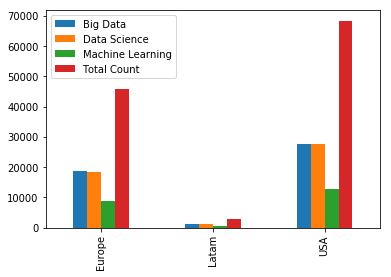

In [60]:
compdf = pd.DataFrame(index=['Europe','Latam','USA'], columns=['Big Data','Data Science','Machine Learning','Total Count'])
compdf.loc['Europe'] = [europedf[columns[1]].sum(),europedf[columns[2]].sum(),europedf[columns[3]].sum(),europedf.iloc[:,-1].sum()]
compdf.loc['Latam'] = [latamdf[columns[1]].sum(),latamdf[columns[2]].sum(),latamdf[columns[3]].sum(),latamdf.iloc[:,-1].sum()]
compdf.loc['USA'] = [usadf[columns[1]].sum(),usadf[columns[2]].sum(),usadf[columns[3]].sum(),usadf.iloc[:,-1].sum()]
compdf.plot.bar()

In [61]:
gdp_df = pd.read_csv('data/cities_gdp.csv')

In [62]:
gdp_df = gdp_df.drop(columns=['METRO_ID','Variables','TIME','Unit Code','Unit','PowerCode Code','PowerCode','Reference Period Code','Reference Period','Flag Codes','Flags'])

In [63]:
gdp_df = gdp_df.sort_values(by='Metropolitan areas')

In [64]:
gdp_df.head()

,Metropolitan areas,VAR,Year,Value
2545,Aachen,GDP_PC,2002,30473.22
2522,Aachen,GDP,2005,17947.14
2523,Aachen,GDP,2006,18428.38
2524,Aachen,GDP,2007,19001.91
2525,Aachen,GDP,2008,19294.57


In [65]:
gdp_df = gdp_df.loc[(gdp_df['VAR'] == 'GDP') & (gdp_df['Year'] == 2012)]
gdp_df = gdp_df.reset_index(drop=True)
gdp_df = gdp_df.drop(columns=['VAR','Year'])

In [66]:
gdp_df.columns = ['City','GDP']

In [67]:
gdp_df.head()

,City,GDP
0,Aachen,19496.51
1,Acapulco de Juárez,6125.81
2,Adelaide,47478.78
3,Aguascalientes,15768.23
4,Akron,24969.01


In [68]:
latam_cities_gdp = pd.read_csv('data/latam_cities_GDP.csv',header=None)
latam_cities_gdp.columns=['Rank','City','Country','Population','GDP per capita']
latam_cities_gdp['GDP'] = latam_cities_gdp.apply(lambda x : float("%.2f" % (int(x['Population'])*int(x['GDP per capita'])/1000000)),axis=1)
latam_cities_gdp.drop(latam_cities_gdp.columns[[0,2,3,4]], axis=1, inplace=True)

In [69]:
latam_cities_gdp

,City,GDP
0,Mexico City,373118.63
1,Sao Paulo,534738.38
2,Buenos Aires,555889.51
3,Rio de Janeiro,288777.60
4,Lima,165769.02
5,Bogota,196392.29
6,Santiago,207258.93
7,Belo Horizonte,112665.84
8,Guadalajara,66593.47
9,Caracas,51804.58


In [70]:
merge = pd.merge(maindf, gdp_df, how='inner', on='City')

In [71]:
merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Amsterdam,1318,1273,516,3107,121289.27
1,Atlanta,1599,265,371,2235,263711.72
2,Austin,938,349,517,1804,96379.31
3,Barcelona,435,354,174,963,135803.15
4,Berlin,995,1011,667,2673,165376.72
5,Boston,2234,6702,1271,10207,305833.34
6,Brussels,717,925,221,1863,134939.93
7,Budapest,274,354,80,708,102939.82
8,Cardiff,57,107,28,192,20212.78
9,Chicago,2045,333,640,3018,554230.82


In [72]:
# Correlacion por el total de ofertas de trabajo
merge['Total New Tech Job Offers'].corr(merge['GDP'])

0.734663456389877

In [73]:
#Correlacion por ofertas de trabajo de Big Data
merge['Big Data Job Offers'].astype('int').corr(merge['GDP'])

0.7732091387528776

In [74]:
#Correlacion por ofertas de trabajo de Data Science
merge['Data Science Job Offers'].astype('int').corr(merge['GDP'])

0.6461216610737379

In [75]:
#Correlacion por ofertas de trabajo de Machine Learning
merge['Machine Learning Job Offers'].astype('int').corr(merge['GDP'])

0.6084486699728913

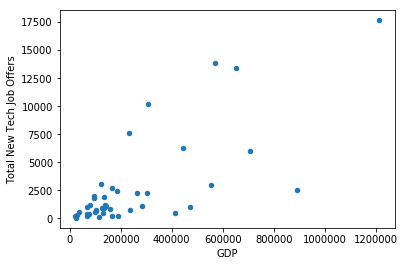

In [76]:
merge.plot.scatter(x='GDP',y='Total New Tech Job Offers')

In [77]:
europe_merge = pd.merge(europedf, gdp_df, how='inner', on='City')
usa_merge = pd.merge(usadf, gdp_df, how='inner', on='City')
latam_merge = pd.merge(latamdf, latam_cities_gdp, how='inner', on='City')

In [78]:
europe_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Amsterdam,1318,1273,516,3107,121289.27
1,Barcelona,435,354,174,963,135803.15
2,Berlin,995,1011,667,2673,165376.72
3,Brussels,717,925,221,1863,134939.93
4,Budapest,274,354,80,708,102939.82
5,Cardiff,57,107,28,192,20212.78
6,Copenhagen,132,268,126,526,98431.89
7,Dublin,570,1191,242,2003,95902.65
8,Stockholm,340,394,213,947,124384.82
9,Frankfurt,511,381,180,1072,143516.43


In [85]:
#Correlacion por el total de ofertas de trabajo
print('Total:', europe_merge['Total New Tech Job Offers'].corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', europe_merge['Big Data Job Offers'].astype('int').corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', europe_merge['Data Science Job Offers'].astype('int').corr(europe_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', europe_merge['Machine Learning Job Offers'].astype('int').corr(europe_merge['GDP']))

Total: 0.826570577757042
Big Data: 0.8866971772413367
Data Science: 0.7423042704648753
Machine Learning: 0.8209280417647304


In [90]:
total_europe = europe_merge['Total New Tech Job Offers'].sum()
total_europe

44728

In [80]:
usa_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Atlanta,1599,265,371,2235,263711.72
1,Austin,938,349,517,1804,96379.31
2,Boston,2234,6702,1271,10207,305833.34
3,Chicago,2045,333,640,3018,554230.82
4,Dallas,1596,225,454,2275,304270.25
5,Houston,674,98,269,1041,470838.44
6,Los Angeles,1592,306,597,2495,891793.72
7,New York,5397,10074,2196,17667,1215233.96
8,San Francisco,3867,7657,2314,13838,568072.44
9,Seattle,3593,853,3153,7599,231514.38


In [86]:
#Correlacion por el total de ofertas de trabajo
print('Total:', usa_merge['Total New Tech Job Offers'].corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', usa_merge['Big Data Job Offers'].astype('int').corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', usa_merge['Data Science Job Offers'].astype('int').corr(usa_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', usa_merge['Machine Learning Job Offers'].astype('int').corr(usa_merge['GDP']))

Total: 0.5337637785215862
Big Data: 0.5128208206637318
Data Science: 0.5378136587466198
Machine Learning: 0.2014171622821191


In [91]:
total_usa = usa_merge['Total New Tech Job Offers'].sum()
total_usa

68489

In [82]:
latam_merge

,City,Big Data Job Offers,Data Science Job Offers,Machine Learning Job Offers,Total New Tech Job Offers,GDP
0,Belo Horizonte,15,11,11,37,112665.84
1,Bogota,61,64,11,136,196392.29
2,Buenos Aires,185,187,155,527,555889.51
3,Guadalajara,175,167,82,424,66593.47
4,Lima,26,18,15,59,165769.02
5,Mexico City,190,234,49,473,373118.63
6,Rio de Janeiro,19,18,13,50,288777.60
7,Santiago,102,61,49,212,207258.93
8,Sao Paulo,341,333,118,792,534738.38


In [87]:
#Correlacion por el total de ofertas de trabajo
print('Total:', latam_merge['Total New Tech Job Offers'].corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Big Data
print('Big Data:', latam_merge['Big Data Job Offers'].astype('int').corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Data Science
print('Data Science:', latam_merge['Data Science Job Offers'].astype('int').corr(latam_merge['GDP']))
#Correlacion por ofertas de trabajo de Machine Learning
print('Machine Learning:', latam_merge['Machine Learning Job Offers'].astype('int').corr(latam_merge['GDP']))

Total: 0.7137479028661143
Big Data: 0.6695436090138939
Data Science: 0.6912077083588487
Machine Learning: 0.7168572156844988


In [92]:
total_latam = latam_merge['Total New Tech Job Offers'].sum()
total_latam

2710

In [94]:
total = total_europe + total_usa + total_latam
total

115927

In [101]:
europe_perc = (total_europe*100)/total
usa_perc = (total_usa*100)/total
latam_perc = (total_latam*100)/total
print('Trabajos ofertados en Europa representan el %.2f porciento de trabajos en el dataset'%europe_perc)
print('Trabajos ofertados en USA representan el %.2f porciento de trabajos en el dataset'%usa_perc)
print('Trabajos ofertados en Latino America representan el %.2f porciento de trabajos en el dataset'%latam_perc)

Trabajos ofertados en Europa representan el 38.58 porciento de trabajos en el dataset
Trabajos ofertados en USA representan el 59.08 porciento de trabajos en el dataset
Trabajos ofertados en Latino America representan el 2.34 porciento de trabajos en el dataset


In [84]:
# Text analysis

In [124]:
import glob
europe_files = glob.glob('data/Europe/*.csv')
usa_files = glob.glob('data/USA/*.csv')
latam_files = glob.glob('data/Latin America/*.csv')

In [102]:
londonBD_jobs = pd.read_csv('data/Europe/London_Big_Data.csv')

In [104]:
londonBD_jobs.head()

,company,job,summary
0,SapientRazorfish,Manager Big Data,Big Data Architect. More than 4+ years of exp...
1,BBC,Data Scientist,Experience manipulating large datasets and us...
2,G-Research,Junior Data Analyst,Identifying and extracting data from various ...
3,Kindred Group,Big Data DevOps,We are looking for a great DevOps to join our...
4,Puretech Talent Ltd,Big Data Engineer,This is truly a fantastic opportunity for any...


In [107]:
londonBD_jobs.loc[0]['summary']

' Big Data Architect. More than 4+ years of experience in Big Data application development involving various data processing techniques – Data Ingestion, In...'

In [119]:
europe_dfdic = {}
for f in europe_files:
    path = f.split("/")
    city_job = ' '.join(path[2].split(".")[0].split("_"))
    europe_dfdic[city_job] = pd.read_csv(f)

In [121]:
usa_dfdic = {}
for f in usa_files:
    path = f.split("/")
    city_job = ' '.join(path[2].split(".")[0].split("_"))
    usa_dfdic[city_job] = pd.read_csv(f)

In [125]:
latam_dfdic = {}
for f in latam_files:
    path = f.split("/")
    city_job = ' '.join(path[2].split(".")[0].split("_"))
    latam_dfdic[city_job] = pd.read_csv(f)